# Import the functions

In [2]:
from runSRIQ import *

# Runs SRIQ

In [19]:
data = 'filtered(21k)'
runSRIQ(data)

running...
Done!


# Runs SRIQ on differing settings

In [14]:
data = 'test_mc_log2var(80)'
studyName = 'log2var'
for i in range(10):
    bagSize = 1200 - i*100
    runSRIQ(data=data, minBagSize = bagSize, studyName = studyName)

running...
Done!
running...
Done!
running...
Done!
running...
Done!
running...
Done!
running...
Done!
running...
Done!
running...
Done!
running...
Done!
running...
Done!


# Removing one cluster

In [65]:
clusterpath = '/Users/jacobkarlstrom/projekt/SRIQ/notebook/data/robustnessData/spiralFalse/6C/500'
datapath = '/Users/jacobkarlstrom/projekt/SRIQ/notebook/data/expressionData/filtered(21k).txt'

removeCluster(datapath, clusterpath)


# Splitting the data

In [30]:
import pandas as pd
from runSRIQ import *
from DE import networkAnalysis as na
obj = na()
frac = 1
data = '/Users/jacobkarlstrom/projekt/SRIQ/notebook/data/expressionData/fpkm.csv'

df = pd.read_csv(data)
obj.df = df

In [48]:

for i in range(6):
    frac = 1-0.1*i
    columns = df.columns.to_list()
    remove_n = int(df.shape[1]*(frac))
    keep = np.random.choice(df.columns, remove_n, replace=False)
    keep = np.insert(keep, 0, 'Gene')
    columns = [ele for ele in columns if ele in keep]
    splitDf = df[keep]
    splitDf = splitDf.drop_duplicates(['Gene'], keep ='first')
    splitDf = splitDf.loc[:,~splitDf.columns.duplicated()]
    splitDf.to_csv(f'data/expressionData/{frac}raw.csv', index = False)

In [69]:
for i in range(6):
    csvpath = f'data/expressionData/{1-0.1*i}raw.csv'
    obj.readCsv(csvpath)
    obj.preProcess()
    bottom = 0.65
    obj.preFilter(bottom)
    print(obj.filterDf.shape)
    obj.filterDf.to_csv(f'data/expressionData/{1-0.1*i}_frac_filtered.txt', sep = '\t', index = False)

(21170, 435)
(21170, 391)
(21170, 348)
(21170, 305)
(21170, 261)
(21170, 217)


In [77]:
for i in range(2, 6):
    print(1-0.1*i)
    runSRIQ(f'{1-0.1*i}_frac_filtered', minBagSize = 500, studyName = f'{(1-0.1*i)*10}0%_frac_')

0.8
running...
Done!
0.7
running...
Done!
0.6
running...
Done!
0.5
running...
Done!


In [71]:
data = 'filtered(21k).txt'
for i in range(0, 1):
    fraction = 1 - 0.1*i
    studyName = 'fraction3_'+ str(int(fraction*10))
    splitRunSRIQ(data = data,frac = fraction,  studyName = studyName, minClusterSize = 0)

(21170, 435)
running...
Done!


# Runs pairwise similarity plots

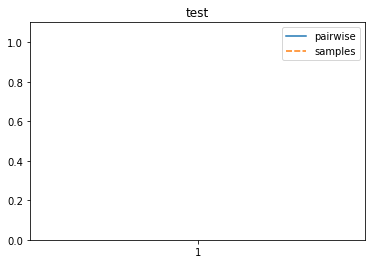

"for p in [path, path2, path3]:\n    #res[p.split('/')[-2]] = list(runRobustness(folderPath = p, returnRes = True))\n    ...\nimport pandas as pd\n\nindex = [1100 -i*100 for i in range(9)]\ndf = pd.DataFrame(data= res,index = index)\nres1, res2 = runRobustness(folderPath = path, returnRes = True)\ndf = pd.DataFrame(data = res1, index = [90, 80, 70, 60, 50])\ndf.columns = ['6 Cluster solution']\ndf['Common samples'] = res2\ndf['Fraction between common and actual'] = [x/res2[counter] for counter, x in enumerate(res1)]\n\nimport seaborn as sns\n\ntitle = 'Pairwise similarity when varying fraction size'\nxtitle = 'Fraction size'\nytitle = 'Pairwise Similarity'\nax = sns.lineplot(data = df)\n\nax.set(ylim= (0,1.1))\nax.invert_xaxis()\nax.set_xlabel(xtitle)\nax.set_ylabel(ytitle)\nax.set_title(title)\nplt.savefig('fractions.pdf', dpi=1080,bbox_inches ='tight')"

In [17]:
from runSRIQ import *
path = '/Users/jacobkarlstrom/projekt/SRIQ/notebook/data/RobustnessData/fractions/6C2/'
path2 = '/Users/jacobkarlstrom/projekt/SRIQ/notebook/data/RobustnessData/BagVariation/spiralTrue/5C/'
path3 = '/Users/jacobkarlstrom/projekt/SRIQ/notebook/data/RobustnessData/BagVariation/spiralTrue/3C/'
title = 'Varying observations fractions 100 vs rest: NC = 6, spiral = True'
xTitle = 'Fraction'
yTitle = 'Similarity'
res = dict()
cp1 = '/Users/jacobkarlstrom/projekt/SRIQ/notebook/data/logpredictor'
cp2 = '/Users/jacobkarlstrom/projekt/SRIQ/software/output/Uppsala_10000itr_1200var_10r/10000/QC_Spiral(true)/dist(0.55)/6'

path = '/Users/jacobkarlstrom/projekt/SRIQ/notebook/data/RobustnessData/Uppsala2/'

for p in [path, path2, path3]:
    #res[p.split('/')[-2]] = list(runRobustness(folderPath = p, returnRes = True))
    ...
import pandas as pd

index = [1100 -i*100 for i in range(9)]
df = pd.DataFrame(data= res,index = index)
res1, res2 = runRobustness(folderPath = path, returnRes = True)
df = pd.DataFrame(data = res1, index = [90, 80, 70, 60, 50])
df.columns = ['6 Cluster solution']
df['Common samples'] = res2
df['Fraction between common and actual'] = [x/res2[counter] for counter, x in enumerate(res1)]

import seaborn as sns

title = 'Pairwise similarity when varying fraction size'
xtitle = 'Fraction size'
ytitle = 'Pairwise Similarity'
ax = sns.lineplot(data = df)

ax.set(ylim= (0,1.1))
ax.invert_xaxis()
ax.set_xlabel(xtitle)
ax.set_ylabel(ytitle)
ax.set_title(title)
plt.savefig('fractions.pdf', dpi=1080,bbox_inches ='tight')

# Compare Consensus with SRIQ runs

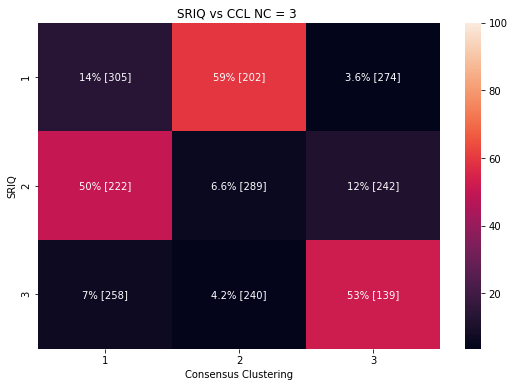

In [1]:
from runSRIQ import * 

cons = '../../../Consensus/new/9k/Test_Pearson_WardD_ConsensusClasses.txt'
sriq = '/Users/jacobkarlstrom/projekt/SRIQ/notebook/data/RobustnessData/BagVariation/spiralTrue/3C/1200/'
cNum = 3
title = 'SRIQ vs CCL NC = 3 '

compareConsensus(csv = cons, cp = sriq, cNum = cNum, figSize = (9,6), title = title, sets = False)

import matplotlib.pyplot as plt

plt.xlabel('Consensus Clustering')

plt.savefig('SRIQvsCCL_NC3.pdf', dpi = 1080)

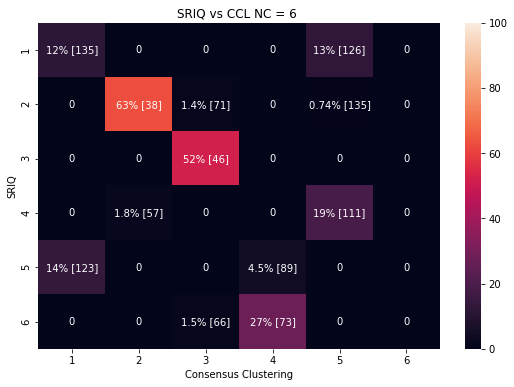

In [11]:
from runSRIQ import * 

cons = '../../../Consensus/new/9k/Test_Pearson_WardD_ConsensusClasses.txt'
sriq = '/Users/jacobkarlstrom/projekt/SRIQ/notebook/data/RobustnessData/BagVariation/spiralFalse/6C/1200/'
cNum = 6
title = 'SRIQ vs CCL NC = 6 '

compareConsensus(csv = cons, cp = sriq, cNum = cNum, figSize = (9,6), title = title, sets = False)

import matplotlib.pyplot as plt

plt.xlabel('Consensus Clustering')

plt.savefig('SRIQvsCCL.pdf', dpi = 1080)


# Compare SRIQ Runs

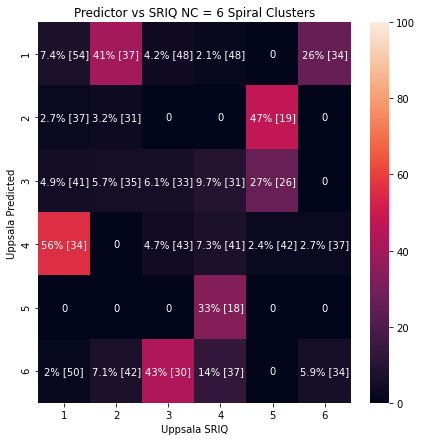

In [16]:
import matplotlib.pyplot as plt
#cp1 = '/Users/jacobkarlstrom/projekt/SRIQ/software/output/90%_frac__10000itr_500var_10r/10000/QC_Spiral(false)/dist(0.61)/6'
#cp2 = '/Users/jacobkarlstrom/projekt/SRIQ/software/output/100%_frac__10000itr_500var_10r/10000/QC_Spiral(false)/dist(0.61)/6'
cp1 = '/Users/jacobkarlstrom/projekt/SRIQ/notebook/data/logpredictor'
cp2 = '/Users/jacobkarlstrom/projekt/SRIQ/software/output/Uppsala_10000itr_1200var_10r/10000/QC_Spiral(true)/dist(0.55)/6'

clusterpaths = [cp1,cp2]
title = 'Predictor vs SRIQ NC = 6 Spiral Clusters'

c1, c2 = get2Clusters(clusterpaths, title = title, sets = True)

plt.xlabel('Uppsala SRIQ')
plt.ylabel('Uppsala Predicted')

plt.savefig('SpiralUppsalaPredvsSRIQ.pdf', dpi = 1080)